In [ ]:
# Vamos a importar las bibliotecas que seran necesarias durante la actividad
# 1 de marzo de 2021
# Cargamos las bibliotecas para trabajar en Algebra Lineal

import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline


Ejercicio 1. Defina las siguientes matrices.

$$\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation*}$$$$\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}$$
y la matrix identidad

$$\begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}$$

Calcule el resultado de $2*I+3*A+A@B$.

Para definir la matriz identidad, se puede utilizar la función np.eye(2, dtype=int). Ver manual de np.eye().

A continuación realizaremos la siguiente operación 
2*I + 3*A + A*B

In [ ]:
# Primero la matriz A 
A = np.array([[1,3],[-1,7]])

# Imprimimos la matriz 
print(A)

[[ 1  3]
 [-1  7]]


In [ ]:
# Repetimos para B 
B = np.array([[5,2],[1,2]])

# Imprimimos la matriz B 
print(B)

[[5 2]
 [1 2]]


In [ ]:
# Por ultimo I 
I=np.eye(2, dtype=int)

# Imprimimos la matriz I 
print(I)

[[1 0]
 [0 1]]


In [ ]:
# Una vez que tenemos las matrices podemos operarlas 
# Empezamos con el calculo
R=(2*I)+(3*A)+(A@B)
# Imprimimos el resultado 
print('El resultado es')
print(R)

El resultado es
[[13 17]
 [-1 35]]


Potencias de Matrices

No existe un símbolo para denotar las potencias de matrices. Por eso definimos la función 'mpow' en la 1a celda de bibliotecas.

from numpy.linalg import matrix_power as mpow

In [ ]:
# Definimos una matriz M
M=np.array([[1,2],[3,4]])

# Imprimimos la matriz M 
print(M)

[[1 2]
 [3 4]]


In [ ]:
# Cuadrado: M^2 = M@M
print(M@M)
print(mpow(M,2))


[[ 7 10]
 [15 22]]
[[ 7 10]
 [15 22]]


In [ ]:
# Quinta potencia: M^5 = M@M@M@M@M
print(M@M@M@M@M)
print(mpow(M,5))

[[1069 1558]
 [2337 3406]]
[[1069 1558]
 [2337 3406]]


Matriz Transpuesta $M^T$

In [ ]:
# La matriz M y su transpuesta
print(M)
print(M.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [ ]:
# El producto de M por M.T, debe ser una matriz simétrica.
M @ M.T

array([[ 5, 11],
       [11, 25]])

Ejercicio 2. Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación$$
\det(M - \lambda I) = 0
$$Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como$$
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
$$y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

$$
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
$$
El Teorema de Cayley-Hamilton nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico$$
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
$$y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$.

Demuestre esto para cualquier matriz M (2x2), ($\det(M) \neq 0$).

In [ ]:
# Definimos una matriz M 
M = np.array([[1,2],[3,4]])

# Imprimimos la matriz M 
print('M =', M)


M = [[1 2]
 [3 4]]


In [ ]:
# Definimos el determinante 
M_det = la.det(M)

# Definimos la traza de una matriz 
trM = np.trace(M)

# Imprimimos las correspondiete determinante y traza
print('det(M) = ', M_det)
print('tr(M) = ', trM)

det(M) =  -2.0
tr(M) =  5


In [ ]:

# Matriz identidad
I = np.eye(2, dtype=int)

# Teorema de Cayley-Hamilton, polinomio característico
PM = M_det*I - trM*M + M@M

# Imprimimos la matriz identidad 
print(I)

# Comprobamos el Teorema de Cayley- Hamilton
print(PM)


[[1 0]
 [0 1]]
[[0. 0.]
 [0. 0.]]



Ejercicio 3:

Resuelva el sistema de ecuaciones.

$$\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}$$
de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

Método de Eliminación Gaussiana

In [ ]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
  "Intercambiar renglones i y j en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  E[i,i]=0
  E[j,j]=0
  E[i,j]=1
  E[j,i]=1
  return E @ A

# Multiplicar un renglón por un aconstante no nula.
def scale_row(A,k,i):
  "Multiplicar el renglón i por k en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  E[i,i]=k
  return E @ A

# Sumar un múltiplo de un renglón a otro renglón.
def add_row(A,k,i,j):
  "Sumar k vaces el renglón j al renglón i en la Matriz A."
  n=A.shape[0]
  E=np.eye(n)
  if i== j:
    E[i,j]=k+1
  else:
    E[i,j]=k
  return E @ A

In [ ]:
# Empezamos declarando una matriz 
# La llamaremos U 

U = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])

# Imprimimos U 

print(U)

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]


In [ ]:
#Matriz Aumentada P: Unimos la Matriz U con la Matriz Identidad
P = np.hstack([U,np.eye(3)])
print(P)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# Tendremos una nueva etiqueta la cual llamaremos P1

P1 = add_row(P,-3,1,0)
print(P1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# Tendremos una nueva etiqueta la cual llamaremos P2
# Ocuparemos resultados previos de P1
P2 = scale_row(P1,5,1)
print(P2)

[[  1.  -3.   1.   1.   0.   0.]
 [  0.  25. -10. -15.   5.   0.]
 [  0.   2.  -1.   0.   0.   1.]]


In [ ]:
# Tendremos una nueva etiqueta la cual llamaremos P3 
# Usaremos resultados pervios en este caso P2 

P3 = add_row(P2,7,2,0)
print(P3)

[[  1.  -3.   1.   1.   0.   0.]
 [  0.  25. -10. -15.   5.   0.]
 [  7. -19.   6.   7.   0.   1.]]


In [ ]:
# Tedremos una nueva etiqueta la cual llamaremos P4 
# Usaremos el resultado previo el cual sera P3

P4 = add_row(P3,5,1,1)
print(P4)

[[  1.  -3.   1.   1.   0.   0.]
 [  0. 150. -60. -90.  30.   0.]
 [  7. -19.   6.   7.   0.   1.]]


In [ ]:
# Tendremos una nueva etiqueta la cual llamaremos P5
# Usaremos el resultado previo el cual sera P4

P5 = scale_row(P4,1/2,1)
print(P5)

[[  1.  -3.   1.   1.   0.   0.]
 [  0.  75. -30. -45.  15.   0.]
 [  7. -19.   6.   7.   0.   1.]]


In [ ]:
# Tendremos una nueva etiqueta la cual llamaremos P6

P6 = add_row(P5,2,0,1)
print(np.round(P6,2))

[[  1. 147. -59. -89.  30.   0.]
 [  0.  75. -30. -45.  15.   0.]
 [  7. -19.   6.   7.   0.   1.]]


La función scipy.linalg.solve()



In [ ]:
# Definiendo el vector b
b=np.array([1,5,0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [ ]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x_sol=la.solve(U,b)
print(x_sol)

[[3.]
 [2.]
 [4.]]


Ejercicio 4:

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre Eigenvalores y Eigenvectores)

$$\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}$$
Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.

In [ ]:
# Empezamos definiendo las matrices B1 

B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])

print(B1)


[[2 0 0]
 [0 3 4]
 [0 4 9]]


In [ ]:
# Ahora definimos la matriz B2 

B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])

print(B2)

[[0 1 0]
 [0 0 1]
 [1 0 0]]


In [ ]:
# Por ultimo definimos la matriz B3 

B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

print(B3)

[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [ ]:
# Obtenemos los eigenvalores/vectores con la biblioteca scipy.linalg.eig()
# Primero para la matriz B1 
eigvals1, eigvecs1 = la.eig(B1)
print('Los eigenvalores de B1:')
print(np.round(eigvals1,2))
print('Los eigenvectores de B1:')
print(np.round(eigvecs1,2))
print('             ')

Los eigenvalores de B1:
[11.+0.j  1.+0.j  2.+0.j]
Los eigenvectores de B1:
[[ 0.    0.    1.  ]
 [ 0.45  0.89  0.  ]
 [ 0.89 -0.45  0.  ]]
             


In [ ]:
# Obtenemos los eigenvalores/vectores con la biblioteca scipy.linalg.eig()
# Primero para la matriz B2 
eigvals2, eigvecs2 = la.eig(B2)
print('Los eigenvalores de B2:')
print(np.round(eigvals2,2))
print('Los eigenvectores de B2:')
print(np.round(eigvecs2,2))
print('             ')


Los eigenvalores de B2:
[-0.5+0.87j -0.5-0.87j  1. +0.j  ]
Los eigenvectores de B2:
[[ 0.58+0.j   0.58-0.j  -0.58+0.j ]
 [-0.29+0.5j -0.29-0.5j -0.58+0.j ]
 [-0.29-0.5j -0.29+0.5j -0.58+0.j ]]
             


In [ ]:
# Obtenemos los eigenvalores/vectores con la biblioteca scipy.linalg.eig()
# Primero para la matriz B3
eigvals3, eigvecs3 = la.eig(B3)
print('Los eigenvalores de B3:')
print(np.round(eigvals3,2))
print('Los eigenvectores de B1:')
print(np.round(eigvecs3,2))
print(eigvecs1)

Los eigenvalores de B3:
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Los eigenvectores de B1:
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.58 -0.58]
 [ 0.    0.   -0.58  0.58]
 [ 1.   -1.    0.58 -0.58]]
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


Ejercicio 5. Se tienen los siguientes 8 puntos:

$$\begin{eqnarray*} 
(x & y) \\
(0.0 &, 0.0), \\ 
(0.5 &, 0.47942), \\ 
(1.0 &, 0.84147), \\
(1.5 &, 0.99749), \\
(2.0 &, 0.90930), \\
(2.5 &, 0.59847), \\
(3.0 &, 0.14112), \\
(3.5 &, -0.35078) \\
\end{eqnarray*}$$
Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos.

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

In [ ]:
# Declaramos los elementos tanto los del eje x como los del eje y 
x = np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])

y = np.array([0.0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078])


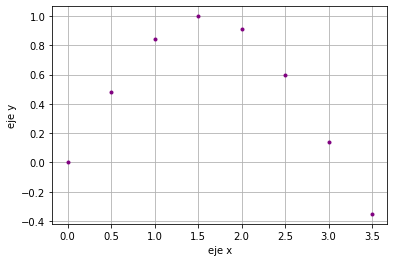

In [ ]:
# Ahora vamos a graficar los valores para generar una grafica 
plt.plot(x,y,'r.', color='purple')
plt.grid()
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.show()

In [ ]:
#La biblioteca Numpy tiene una función para crear la matriz de Vandemonde
X = np.vander(x, increasing=True)
# Vamos a imprimir los primeros 4 renglones
# Al igual imprimimos 4 primeros columnas 
# Generaremos un arreglo de [4,4]
print(X[:4,:4])

[[1.    0.    0.    0.   ]
 [1.    0.5   0.25  0.125]
 [1.    1.    1.    1.   ]
 [1.    1.5   2.25  3.375]]


In [ ]:
# Vector y
y = np.array(y).reshape(8,1)

# Usamos la función de scipy.linalg.solve(), para encontrar los 8 coeficientes 
# de la solución lineal Xa=y
l = la.solve(X,y)
print(np.round(l,5))

[[ 0.00000e+00]
 [ 1.00067e+00]
 [-3.71000e-03]
 [-1.58870e-01]
 [-8.30000e-03]
 [ 1.32000e-02]
 [-1.54000e-03]
 [ 2.00000e-05]]


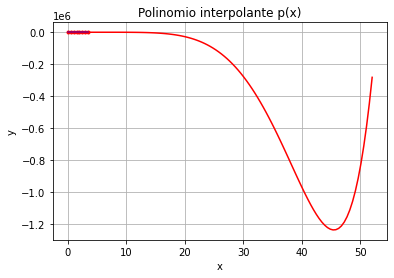

In [ ]:
#Graficamos el polinomio interpolante y los puntos interpolados
xs = np.linspace(0,52,110)
ys = sum([a[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys,color='r')
plt.plot(x, np.sin(x), color='purple')
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ejercicio 6. Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

NOTA: Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones.

In [ ]:
# Pronóstico de Series de Tiempo

# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para el análisis de Series de Tiempo y Modelos de Pronóstico
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import pandas.util.testing as tm

# Suprimir mensajes de alertas de cambios futuros
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/Aglaeth/fisica_computacional/main/Actividad4/3042.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251'
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha','Precip','Evap','Tmax','Tmin',]
df_Pocitas = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') 

# Hacemos una copia de trabajo y preservamos el dataframe original
df_Poc = df_Pocitas.copy()

# Cambiamos la palabra nulo por un vacío y verificamos
str_Nulo = 'Nulo'
df_Paz = df_Poc.replace(to_replace=str_Nulo, value='', regex=True)

# Convertimos los valores de las variables ambientales a números flotantes y verificamos 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_Paz[cols] = pd.to_numeric(df_Poc[cols], errors='coerce')


# Definimos un nuevo dataframe por si hay que regresarse
df_nuv = df_Paz.copy()
df_nuv['Fecha'].head()

# Se convierte el objeto Fecha a variable fecha que python reconoce
df_nuv['Fecha'] = pd.to_datetime(df_nuv['Fecha'], dayfirst=True).copy()


# Añadimos dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_nuv['Año'] = df_nuv['Fecha'].dt.year
df_nuv['Mes'] = df_nuv['Fecha'].dt.month

# Hacemos una copia del trabajo y es con el que trabajaremos para el análisis de datos
df_met = df_nuv.copy()

# Eliminamos la columna de Mes(numérico) y agregamos Mes(caractéres)
df_met.drop('Mes', axis=1, inplace=True)
df_met['Mes'] = df_met['Fecha'].dt.strftime('%b')

# Nueva copia del DataFrame para Series de Tiempo
df_met_ts = df_met.copy()

# Reemplazamos el índice por la variable 'Fecha' 
df_met_ts = df_met.set_index('Fecha')
df_met_ts.info()

# Seleccionaremos un conjunto de años de 30 años
df_80 = df_met_ts[(df_met_ts['Año'] >= 1952) & (df_met_ts['Año'] < 1985)]
df_90 = df_met_ts[(df_met_ts['Año'] >= 1985) & (df_met_ts['Año'] < 2017)]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22961 entries, 1952-09-01 to 2017-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  22950 non-null  float64
 1   Evap    0 non-null      float64
 2   Tmax    22900 non-null  float64
 3   Tmin    22839 non-null  float64
 4   Año     22961 non-null  int64  
 5   Mes     22961 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
# Método de descomposición usando la biblioteca statsmodels.tsa
ts_Tmax = df_80.Tmax
decomp_Tmax = sm.tsa.seasonal_decompose(ts_Tmax.interpolate(), model='additive', freq=365)

temp_Tmax = decomp_Tmax.trend
temp_Tmax = temp_Tmax[~np.isnan(temp_Tmax)]
print(temp_Tmax)

Fecha
1953-03-02    30.272603
1953-03-03    30.261644
1953-03-04    30.256164
1953-03-05    30.258904
1953-03-06    30.269863
                ...    
1984-06-28    29.106849
1984-06-29    29.094521
1984-06-30    29.086301
1984-07-01    29.069863
1984-07-02    29.050685
Name: Tmax, Length: 11204, dtype: float64


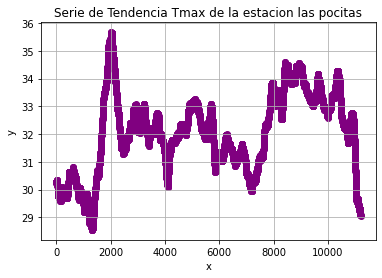

In [ ]:
n = 11204
x = np.arange(0,n)
y = tem_Tmax
plt.scatter(x,y, color = "purple");
plt.grid()
plt.title('Serie de Tendencia Tmax de la estacion las pocitas')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Construimos la matriz de Vandermonde
X = np.column_stack([np.ones(n),x])

print(X[:6,:6])

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[3.10064847e+01 1.89547063e-04]


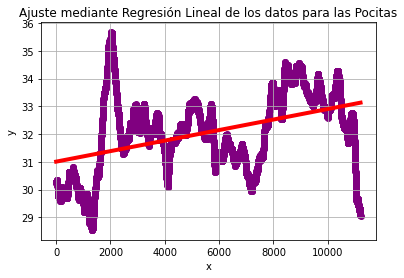

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,n,30)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y, color = "purple");
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos para las Pocitas')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Método de descomposición usando la biblioteca statsmodels.tsa
ts_temp_min = df_80.Tmin
decomp_Tmin = sm.tsa.seasonal_decompose(ts_temp_min.interpolate(), model='additive', freq=365)

temp_Tmin = decomp_Tmin.trend
temp_Tmin = temp_Tmin[~np.isnan(temp_Tmin)]
print(temp_Tmin)


Fecha
1953-03-02    13.310959
1953-03-03    13.319178
1953-03-04    13.321918
1953-03-05    13.319178
1953-03-06    13.310959
                ...    
1984-06-28    13.223288
1984-06-29    13.246575
1984-06-30    13.253425
1984-07-01    13.267123
1984-07-02    13.269863
Name: Tmin, Length: 11204, dtype: float64


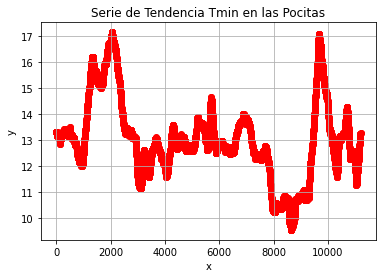

In [ ]:
n = 11204
x = np.arange(0,n)
y = temp_Tmin
plt.scatter(x,y, color = "r");
plt.grid()
plt.title('Serie de Tendencia Tmin en las Pocitas')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[ 1.39059091e+01 -1.61380247e-04]


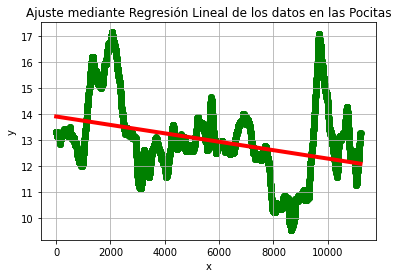

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(0,n,30)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y, color = "g");
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos en las Pocitas')
plt.xlabel('x')
plt.ylabel('y')
plt.show()